In [36]:
from scipy.integrate import odeint
import numpy as np
from matplotlib import pyplot as plt

Plasma Membrane

In [37]:
# Params
a = 1
b = 1
A_p = 314
j = 10**2
K_d = 0.74
K_m = 2.5
k = j/K_d
V_m = 8.8 * 10**3
V = 523
W = 32
y = 0.000083
z = .002
f = 0.1
A_e = 47
g = 0.1


S_e = 10

In [38]:
# Algebraically Solved Steady States
def eval_alg():
    P = (A_p*S_e*W*a*y + A_p*S_e*W*j*y + S_e*V_m*W*a - np.sqrt(S_e*W*(A_p**2*S_e*W*a**2*y**2 + 2*A_p**2*S_e*W*a*j*y**2 + A_p**2*S_e*W*j**2*y**2 - 2*A_p*S_e*V_m*W*a**2*y - 2*A_p*S_e*V_m*W*a*j*y + 4*A_p*K_m*V_m*a**2*y + 4*A_p*K_m*V_m*a*j*y + S_e*V_m**2*W*a**2)))/(2*A_p*S_e*a*k*(S_e*W - K_m))
    P_b = y/a
    P_u = y/z
    S = (S_e*W*(A_p*a*y + A_p*j*y - V_m*a) + np.sqrt(S_e*W*(A_p**2*S_e*W*a**2*y**2 + 2*A_p**2*S_e*W*a*j*y**2 + A_p**2*S_e*W*j**2*y**2 - 2*A_p*S_e*V_m*W*a**2*y - 2*A_p*S_e*V_m*W*a*j*y + 4*A_p*K_m*V_m*a**2*y + 4*A_p*K_m*V_m*a*j*y + S_e*V_m**2*W*a**2)))/(2*V_m*a)
    return [P, P_b, P_u, S]

print(eval_alg())

[6.203274996901706e-05, 8.3e-05, 0.041499999999999995, 0.000748007964324312]


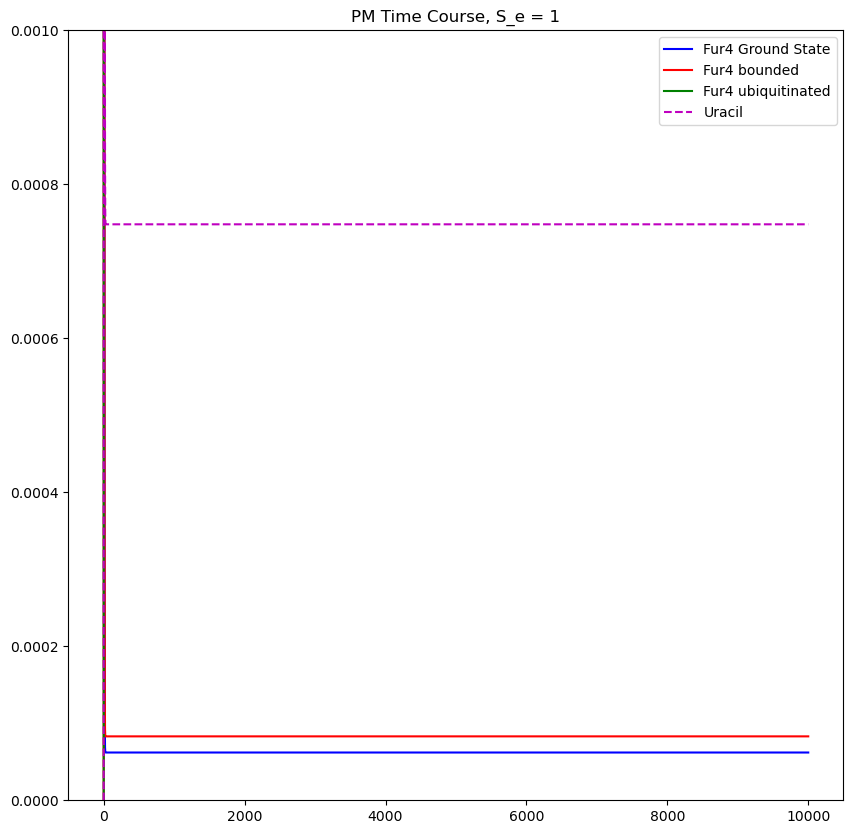

In [47]:
# Numerically Solved Steady States
def pm_func(initial_val, t, y, k, S_e, W, j, a, z, v_max, V, K_m):
    P, P_b, P_u, S = initial_val

    dP_dt = y - k * S_e * P - (k / W) * S * P + j * P_b
    dPb_dt = k * S_e * P + (k / W) * S * P - j * P_b - a * P_b
    dPu_dt = a * P_b - z * P_u
    dS_dt = -1 * (A_p / V) * (k / W) * S * P + (A_p/V) * (j + a) * P_b - v_max * S / (V * (K_m + S))

    return [dP_dt, dPb_dt, dPu_dt, dS_dt]

def eval_pm_num():
    t_range = np.linspace(0, 40000, 10000)
    initial_val = [1,0,0,0]
    sol = odeint(pm_func, y0=initial_val, t=t_range, args=(y, k, S_e, W, j, a, z, V_m, V, K_m))
    plt.figure(figsize=(10,10))
    plt.plot(t_range, sol[:, 0], 'b-')
    plt.plot(t_range, sol[:, 1], 'r')
    plt.plot(t_range, sol[:, 2], 'g')
    plt.plot(t_range, sol[:, 3], 'm--')
    plt.ylim((0,1))

    plt.legend(["Fur4 Ground State", "Fur4 bounded", "Fur4 ubiquitinated", "Uracil"])
    plt.title("PM Time Course")
    plt.show()

eval_pm_num()

Compare and Verify Steady States

In [40]:
def Verify():
    P, Pb, Pu, S = eval_alg()

    t_range = np.linspace(0, 40000, 10000)
    initial_val = [1,0,0,0]
    num_sol = odeint(pm_func, y0=initial_val, t=t_range, args=(y, k, S_e, W, j, a, z, V_m, V, K_m))[-1]


    print("Fur4 Ground State: ", np.allclose(P, num_sol[0]))
    print("Fur4 Bounded: ", np.allclose(Pb, num_sol[1]))
    print("Fur4 Ubiquitinated: ", np.allclose(Pu, num_sol[2]))
    print("Uracil: ", np.abs(S - num_sol[3]) < 1e-12 )


    print(num_sol[0], num_sol[1], num_sol[2], num_sol[3])
Verify()

Fur4 Ground State:  True
Fur4 Bounded:  True
Fur4 Ubiquitinated:  True
Uracil:  True
6.203274996903026e-05 8.299999999999974e-05 0.041500000075388455 0.0007480079643254125


Full Model

In [41]:
def eval_fm_alg(S):
    P = (S*W*a**2*k*y*z + S*W*a*j*k*y*z + W**2*a**2*b*f*y + W**2*a**2*f*y*z + 2*W**2*a*b*f*j*y + 2*W**2*a*f*j*y*z + W**2*b*f*j**2*y + W**2*f*j**2*y*z)/(S**2*a**2*k**2*z + S*S_e*W*a**2*k**2*z + S*W*a**2*f*k*z + S*W*a*f*j*k*z + S_e*W**2*a**2*f*k*z + S_e*W**2*a*f*j*k*z)
    Pb = (S*a*k*y*z + W*a*b*f*y + W*a*f*y*z + W*b*f*j*y + W*f*j*y*z)/(S*a**2*k*z + W*a**2*f*z + W*a*f*j*z)
    Pu = (S*a*k*y*z + W*a*b*f*y + W*a*f*y*z + W*b*f*j*y + W*f*j*y*z)/(S*a*g*k*z + W*a*f*g*z + W*f*g*j*z)
    E = (A_p*W*a*b*y + A_p*W*b*j*y)/(A_e*S*a*k*z + A_e*W*a*f*z + A_e*W*f*j*z)
    Eb = A_p*S*b*k*y/(A_e*S*a*k*z + A_e*W*a*f*z + A_e*W*f*j*z)
    Eu = A_p*y/(A_e*z)

    return [P, Pb, Pu, E, Eb, Eu]

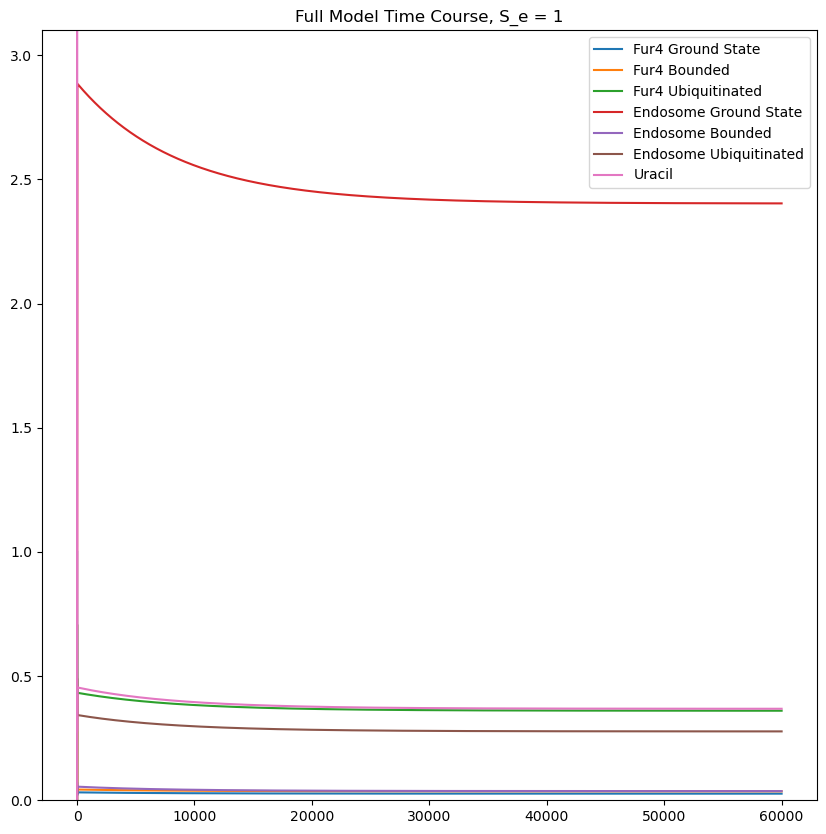

In [42]:
def fm_func(initial_val, t, y, k, S_e, W, j, f, A_e, A_p, a, g, b, z, V_m, V, K_m):
    P, P_b, P_u, E, E_b, E_u, S = initial_val

    dPdt = y - k*S_e*P - (k/W)*S*P + j*P_b + f*(A_e/A_p)*E
    dPbdt = k*S_e*P + (k/W)*S*P - j*P_b - a*P_b
    dPudt = a*P_b - g*P_u
    dEdt = b*E_u - (k/W)*S*E + j*E_b - f*E
    dEbdt = (k/W)*S*E - j*E_b - a*E_b
    dEudt = g*(A_p/A_e)*P_u - b*E_u + a*E_b - z*E_u
    dSdt = -(k/W)*S*((A_p/V)*P + (A_e/V)*E) + (j+a)*((A_p/V)*P_b + (A_e/V)*E_b) - V_m*S / (V*(K_m +S))

    return [dPdt, dPbdt, dPudt, dEdt, dEbdt, dEudt, dSdt]


def eval_fm_num():
    t_range = np.linspace(0, 100000, 100000)
    initial_val = [1,0,0,0,0,0,0]
    sol = odeint(fm_func, y0=initial_val, t=t_range, args=(y, k, S_e, W, j, f, A_e, A_p, a, g, b, z, V_m, V, K_m))
    plt.figure(figsize=(10,10))
    for i in range(7):
        plt.plot(t_range, sol[:, i])

    plt.ylim((0,1))

    plt.legend(["Fur4 Ground State", "Fur4 Bounded", "Fur4 Ubiquitinated", "Endosome Ground State", "Endosome Bounded", "Endosome Ubiquitinated","Uracil" ])
    plt.title("Full Model Time Course")
    plt.show()

eval_fm_num()

Compare and Verify Analytical and Numerical Steady States

In [43]:
t_range = np.linspace(0, 400000, 100000)
initial_val = [1,0,0,0,0,0,0]
num_sol = odeint(fm_func, y0=initial_val, t=t_range, args=(y, k, S_e, W, j, f, A_e, A_p, a, g, b, z, V_m, V, K_m))[-1]

P, Pb, Pu, E, Eb, Eu = eval_fm_alg(num_sol[-1])

print("Fur4 Ground State: ", np.allclose(P, num_sol[0]))
print("Fur4 Bounded: ", np.allclose(Pb, num_sol[1]))
print("Fur4 Ubiquitinated: ", np.allclose(Pu, num_sol[2]))
print("Fur4 Endosome: ", np.allclose(E, num_sol[3]))
print("Fur4 Endosome Bounded: ", np.allclose(Eb, num_sol[4]))
print("Fur4 Endosome Ubiquitinated: ", np.allclose(Eu, num_sol[5]))

print(num_sol[0], num_sol[1], num_sol[2], num_sol[3], num_sol[4], num_sol[5], num_sol[6])

Fur4 Ground State:  True
Fur4 Bounded:  True
Fur4 Ubiquitinated:  True
Fur4 Endosome:  True
Fur4 Endosome Bounded:  True
Fur4 Endosome Ubiquitinated:  True
0.026632992955467606 0.03604437931362869 0.36044379313701314 2.4025261924415866 0.03700270047171487 0.277255319715374 0.3683565196608882
